<a href="https://colab.research.google.com/github/sara010896/PPCA_UnB/blob/main/Carteira_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings


warnings.filterwarnings('ignore')

In [2]:
dias_uteis = 252
rf_anual = 0.02 # taxa livre de risco anual
inicio = "2020-07-19"
fim = "2025-07-19"
capital_inicial = 35000.0

In [3]:
# Definicao das carteiras principais
bilhete = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'JPM']
analise_comparativa = '^GSPC' # indice de referencia

In [4]:
print("Iniciando a coleta de informaçoes... um momento.")
ativos = bilhete + [analise_comparativa]
dados = yf.download(ativos, start=inicio, end=fim, progress=False)
if dados.empty:
  raise RuntimeError('Falha ao obter dados. Verifique conexão.')

print("Coleta concluída.")


Iniciando a coleta de informaçoes... um momento.
Coleta concluída.


In [5]:
dados

Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG         JPM        MSFT   
Date                                                                     
2020-07-20   95.501892  159.841995   77.753906   85.081993  202.398178   
2020-07-21   94.183830  156.914505   77.391388   86.927063  199.672134   
2020-07-22   94.448395  154.995499   77.891464   86.297462  202.541656   
2020-07-23   90.149460  149.327499   75.268913   86.551056  193.732178   
2020-07-24   89.926125  150.445496   75.079712   85.938942  192.546082   
...                ...         ...         ...         ...         ...   
2025-07-14  208.383499  225.690002  182.646744  288.700012  502.194427   
2025-07-15  208.872955  226.350006  182.936493  286.549988  504.989838   
2025-07-16  209.921768  223.190002  183.605896  285.820007  504.790161   
2025-07-17  209.781921  223.880005  184.535065  289.899994  510.860199   
2025-07-18  210.940598  226.130005  185.773956  291.269989  509.212891   

Price                          High                                      ...  \
Ticker            ^GSPC        AAPL        AMZN        GOOG         JPM  ...   
Date                                                                     ...   
2020-07-20  3251.840088   95.640257  160.067993   77.980854   86.035118  ...   
2020-07-21  3257.300049   96.368507  162.029007   78.810184   87.486697  ...   
2020-07-22  3276.020020   95.130499  157.500000   77.966452   87.556637  ...   
2020-07-23  3235.659912   94.259077  154.913498   78.059319   86.874591  ...   
2020-07-24  3215.629883   90.270821  151.578995   75.366052   87.268079  ...   
...                 ...         ...         ...         ...         ...  ...   
2025-07-14  6268.560059  210.670912  226.660004  184.565027  289.299988  ...   
2025-07-15  6243.759766  211.649803  227.270004  185.244428  291.950012  ...   
2025-07-16  6263.700195  212.159219  226.100006  185.169501  290.730011  ...   
2025-07-17  6297.359863  211.559902  224.500000  185.021629  290.299988  ...   
2025-07-18  6296.790039  211.549907  226.399994  187.192686  292.500000  ...   

Price             Open                                          Volume  \
Ticker            GOOG         JPM        MSFT        ^GSPC       AAPL   
Date                                                                     
2020-07-20   75.248052   85.195667  196.085186  3224.290039   90318000   
2020-07-21   78.810184   85.440528  204.368618  3268.520020  103433200   
2020-07-22   77.494682   87.136914  200.102545  3254.860107   89001600   
2020-07-23   77.815990   86.131327  198.179973  3271.639893  197004400   
2020-07-24   74.437114   87.093189  191.704345  3218.580078  185438800   
...                ...         ...         ...          ...        ...   
2025-07-14  181.907414  287.070007  500.696889  6255.149902   38840100   
2025-07-15  183.775739  288.000000  502.194415  6295.290039   42296300   
2025-07-16  184.155408  288.399994  504.350881  6254.500000   47490500   
2025-07-17  182.951489  283.440002  504.850060  6263.399902   48068100   
2025-07-18  186.453342  289.519989  513.635613  6312.950195   48974600   

Price                                                            
Ticker           AMZN      GOOG       JPM      MSFT       ^GSPC  
Date                                                             
2020-07-20  151964000  31146000  14458100  36884800  3979340000  
2020-07-21  122426000  24324000  17798100  37990400  4556610000  
2020-07-22   82084000  18640000  14271200  49605700  4267160000  
2020-07-23  113138000  32552000  12870200  67457000  4296760000  
2020-07-24  112648000  30880000  12744200  39827000  3689410000  
...               ...       ...       ...       ...         ...  
2025-07-14   35702600  20990400   9079900  12058800  4722250000  
2025-07-15   34907300  23911600  12526100  14927200  5133670000  
2025-07-16   39535900  21152600   9979800  15154400  5177460000  
2025-07-17   

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-07-20 to 2025-07-18
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    1256 non-null   float64
 1   (Close, AMZN)    1256 non-null   float64
 2   (Close, GOOG)    1256 non-null   float64
 3   (Close, JPM)     1256 non-null   float64
 4   (Close, MSFT)    1256 non-null   float64
 5   (Close, ^GSPC)   1256 non-null   float64
 6   (High, AAPL)     1256 non-null   float64
 7   (High, AMZN)     1256 non-null   float64
 8   (High, GOOG)     1256 non-null   float64
 9   (High, JPM)      1256 non-null   float64
 10  (High, MSFT)     1256 non-null   float64
 11  (High, ^GSPC)    1256 non-null   float64
 12  (Low, AAPL)      1256 non-null   float64
 13  (Low, AMZN)      1256 non-null   float64
 14  (Low, GOOG)      1256 non-null   float64
 15  (Low, JPM)       1256 non-null   float64
 16  (Low, MSFT)      1256 non-null   float64
 

In [7]:
# Utilizamos apenas os precos de fechamento. Representam o valor final do dia.
precos = dados['Close']
precos.columns = bilhete + ['SP']

print(f"Foram obtidos {precos.shape[0]} registros. Período de {precos.index[0].date()} até {precos.index[-1].date()}.")

Foram obtidos 1256 registros. Período de 2020-07-20 até 2025-07-18.


In [8]:
normalizado = precos / precos.iloc[0] * 100

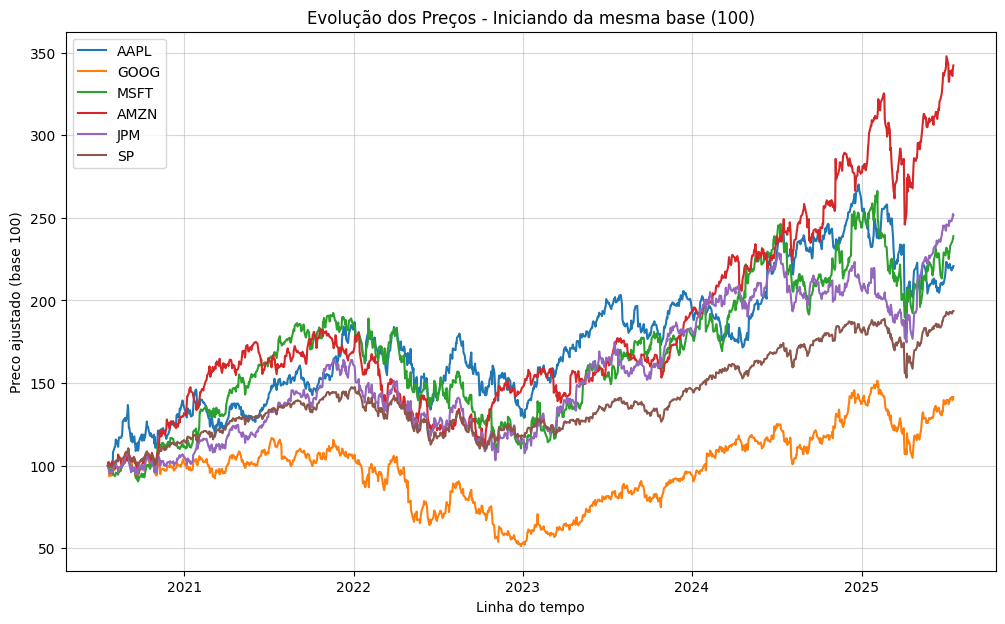

In [ ]:
plt.figure(figsize=(12,7))
for col in normalizado.columns:
  plt.plot(normalizado.index, normalizado[col], label=col)
plt.title('Evolução dos Preços - Iniciando da mesma base (100)')
plt.xlabel('Linha do tempo')
plt.ylabel("Preco ajustado (base 100)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

In [ ]:
# Interpretacao_1
print("""
A trajetória observada foi marcada por contrastes.
Apple e Microsoft se destacaram, superando o índice de referência e mostrando uma liderança clara.
A Amazon teve um percurso mais intenso, com fortes crescimentos, mas também correções significativas.
O Google seguiu em linha com o mercado, de forma consistente e sem exageros.
Já o JP Morgan apresentou um perfil mais estável, refletindo o comportamento típico do setor bancário.

A pandemia de 2020 trouxe uma queda abrupta, um momento que ficou na memória.
Logo depois, a recuperação foi rápida, impulsionada pelas políticas governamentais.
Em 2022, a alta dos juros pesou sobre os preços e trouxe retração ao mercado.
Mas, em 2023, os sinais de recuperação reacenderam expectativas mais otimistas
""")



A trajetória observada foi marcada por contrastes.
Apple e Microsoft se destacaram, superando o índice de referência e mostrando uma liderança clara.
A Amazon teve um percurso mais intenso, com fortes crescimentos, mas também correções significativas.
O Google seguiu em linha com o mercado, de forma consistente e sem exageros.
Já o JP Morgan apresentou um perfil mais estável, refletindo o comportamento típico do setor bancário.

A pandemia de 2020 trouxe uma queda abrupta, um momento que ficou na memória.
Logo depois, a recuperação foi rápida, impulsionada pelas políticas governamentais.
Em 2022, a alta dos juros pesou sobre os preços e trouxe retração ao mercado.
Mas, em 2023, os sinais de recuperação reacenderam expectativas mais otimistas



In [9]:
# Calculo dos retornos logaritmicos diarios
retorno = np.log(precos / precos.shift(1)).dropna()
retorno.columns = bilhete + ['SP']

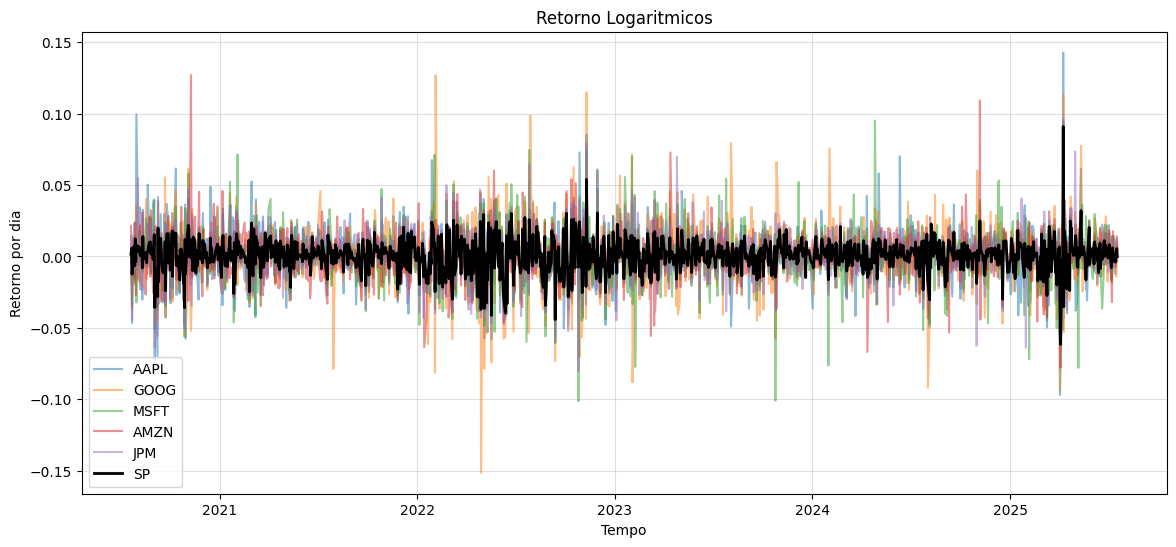

In [10]:
# Serie temporal dos retornos
plt.figure(figsize=(14,6))
for t in bilhete:
  plt.plot(retorno.index, retorno[t], alpha=0.5, label=t)
plt.plot(retorno.index, retorno['SP'], color='black', linewidth=2, label='SP')
plt.title("Retorno Logaritmicos")
plt.xlabel("Tempo")
plt.ylabel("Retorno por dia")
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

<Figure size 1200x600 with 0 Axes>

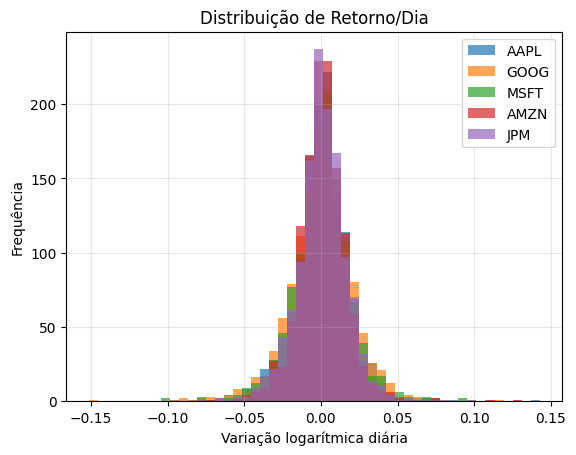

In [11]:
# Distribuicao de frequencia dos retornos
plt.figure(figsize=(12,6))
retorno[bilhete].plot(kind='hist', bins=50, alpha=0.7)
plt.title("Distribuição de Retorno/Dia")
plt.xlabel("Variação logarítmica diária")
plt.ylabel("Frequência")
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
# Estatisticas principais
estatisticas = retorno.describe().T[['mean','std']]
estatisticas['retorno_porano'] = estatisticas['mean'] * 252
estatisticas['volatilidade_porano'] = estatisticas['std'] * np.sqrt(252)
estatisticas['sharpe'] = estatisticas['retorno_porano'] / estatisticas['volatilidade_porano']

print("Resumo estatístico (simplificado):")
print(estatisticas.round(4))

Resumo estatístico (simplificado):
        mean     std  retorno_porano  volatilidade_porano  sharpe
AAPL  0.0006  0.0187          0.1591               0.2973  0.5352
GOOG  0.0003  0.0223          0.0697               0.3532  0.1972
MSFT  0.0007  0.0195          0.1749               0.3093  0.5654
AMZN  0.0010  0.0161          0.2471               0.2550  0.9690
JPM   0.0007  0.0168          0.1853               0.2672  0.6934
SP    0.0005  0.0109          0.1327               0.1738  0.7635


In [13]:
# Interpretacao_2
print("""
O cenário observado é bastante interessante.
A Amazon se destacou pela maior variação — muita energia, mas também marcada por instabilidade.
O JP Morgan manteve um perfil mais contido, como é comum no setor financeiro.
Apple e Microsoft seguiram em linha com o índice, mostrando equilíbrio.
Já o Google ficou um pouco acima da média de risco.

Os picos de volatilidade, por sua vez, sempre apareceram próximos a grandes eventos externos — crises, decisões políticas, mudanças inesperadas.
É o retrato de um mercado em constante movimento, que nunca dorme.
""")


O cenário observado é bastante interessante.
A Amazon se destacou pela maior variação — muita energia, mas também marcada por instabilidade.
O JP Morgan manteve um perfil mais contido, como é comum no setor financeiro.
Apple e Microsoft seguiram em linha com o índice, mostrando equilíbrio.
Já o Google ficou um pouco acima da média de risco.

Os picos de volatilidade, por sua vez, sempre apareceram próximos a grandes eventos externos — crises, decisões políticas, mudanças inesperadas.
É o retrato de um mercado em constante movimento, que nunca dorme.



In [14]:
# Simulação das melhores carteiras.
# Experimento Monte Carlo: probabilidade, estratégia e análise.
# Cada carteira é um caminho possível. Algumas excelentes, outras frágeis.

portfolio_size = 50000  # 50.000 carteiras
bilhetes = len(bilhete)

# Matriz de covariância por ano e retorno esperado
cov_matrix = retorno[bilhete].cov() * 252
expected_returns = retorno[bilhete].mean() * 252

print("Matriz de covariância - por ano:")
print(cov_matrix.round(4))

np.random.seed(42)
resultados = []

for _ in range(portfolio_size):
    pesos = np.random.random(bilhetes)
    pesos /= np.sum(pesos)

    port_retorno = np.dot(pesos, expected_returns)
    port_risco = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix, pesos)))

    rf = 0.02  # taxa livre de risco
    sharpe = (port_retorno - rf) / port_risco

    resultados.append([port_retorno, port_risco, sharpe] + list(pesos))

colunas = ['retorno','risco','sharpe'] + bilhete
resultados_dataframe = pd.DataFrame( resultados, columns=colunas )


Matriz de covariância - por ano:
        AAPL    GOOG    MSFT    AMZN     JPM
AAPL  0.0884  0.0622  0.0526  0.0230  0.0526
GOOG  0.0622  0.1248  0.0710  0.0268  0.0648
MSFT  0.0526  0.0710  0.0957  0.0245  0.0565
AMZN  0.0230  0.0268  0.0245  0.0650  0.0193
JPM   0.0526  0.0648  0.0565  0.0193  0.0714


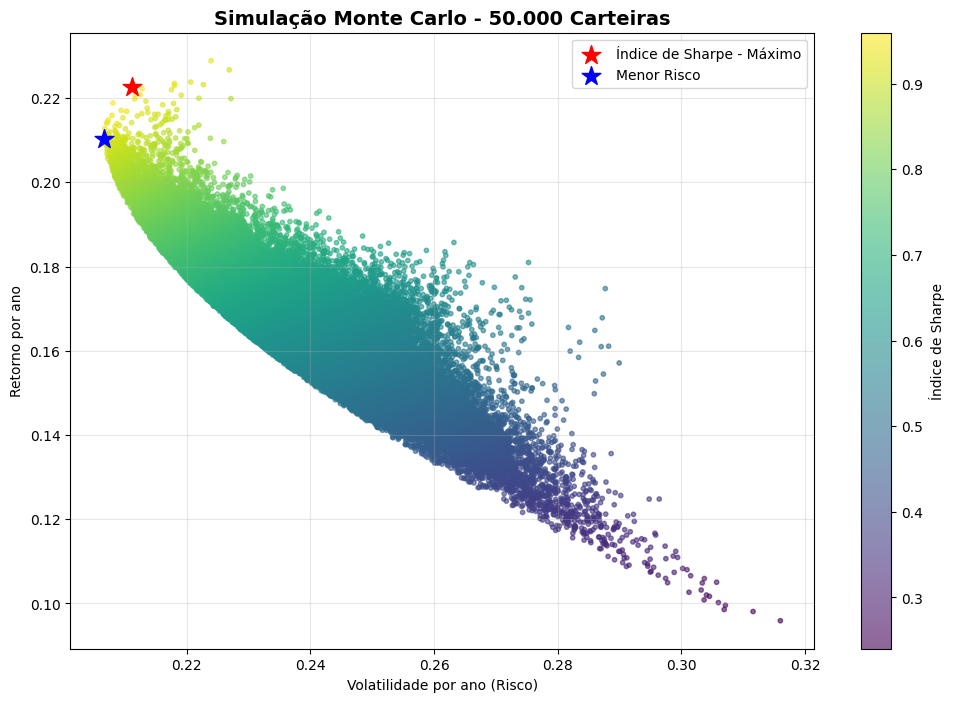

In [15]:
# Visualizacao das carteiras simuladas
plt.figure(figsize=(12,8))
scatter = plt.scatter(resultados_dataframe['risco'], resultados_dataframe['retorno'],
                      c=resultados_dataframe['sharpe'], cmap='viridis',
                      s=10, alpha=0.6)
plt.colorbar( scatter, label="Índice de Sharpe" )
plt.title("Simulação Monte Carlo - 50.000 Carteiras",fontsize=14,fontweight="bold")
plt.xlabel("Volatilidade por ano (Risco)")
plt.ylabel("Retorno por ano")
plt.grid( True, alpha=0.3 )

# Carteiras especiais
max_sharpe = resultados_dataframe.loc[resultados_dataframe['sharpe'].idxmax()]
min_risco = resultados_dataframe.loc[resultados_dataframe['risco'].idxmin()]

plt.scatter(max_sharpe['risco'], max_sharpe['retorno'],
            color='red', marker='*', s=200, label='Índice de Sharpe - Máximo')
plt.scatter(min_risco['risco'], min_risco['retorno'],
            color='blue', marker='*', s=200, label='Menor Risco')
plt.legend()
plt.show()

In [16]:
print("""
O mapa das possibilidades é revelado.
Cada ponto representa uma carteira. Algumas frágeis, outras promissoras.
As estrelas indicam escolhas excepcionais.
Índice de Sharpe - Máximo: equilíbrio raro entre risco e retorno.
Menor risco: quase serena, porém com menor retorno.
Monte Carlo nos lembra: o mercado oferece caminhos, não certezas.
""")


O mapa das possibilidades é revelado.
Cada ponto representa uma carteira. Algumas frágeis, outras promissoras.
As estrelas indicam escolhas excepcionais.
Índice de Sharpe - Máximo: equilíbrio raro entre risco e retorno.
Menor risco: quase serena, porém com menor retorno.
Monte Carlo nos lembra: o mercado oferece caminhos, não certezas.



In [17]:
# Função de risco quadrático
ret_log_assets = retorno[bilhete]
mu_anual = ret_log_assets.mean() * 252
cov_anual = ret_log_assets.cov() * 252
n = bilhetes
Sigma = cov_anual.values
mu = mu_anual.values


bounds = tuple((0, 1) for _ in range(n)) # sem short
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},)

In [18]:
# grade de retornos alvo
target_rs = np.linspace(mu.min()*0.8, mu.max()*1.2, 100)
front_risk = []
front_ret = []
for tr in target_rs:
  cons_tr = (
    {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
    {'type': 'eq', 'fun': lambda w, mu=mu, tr=tr: np.dot(w, mu) - tr}
  )
  x0 = np.repeat(1.0 / n, n)
  try:
    res = minimize(lambda w: w.T @ Sigma @ w, x0, method='SLSQP', bounds=bounds, constraints=cons_tr)
    if res.success:
      w_opt = res.x
      front_ret.append(np.dot(w_opt, mu))
      front_risk.append(np.sqrt(w_opt.T @ Sigma @ w_opt))
    else:
      front_ret.append(np.nan)
      front_risk.append(np.nan)
  except Exception:
    front_ret.append(np.nan)
    front_risk.append(np.nan)

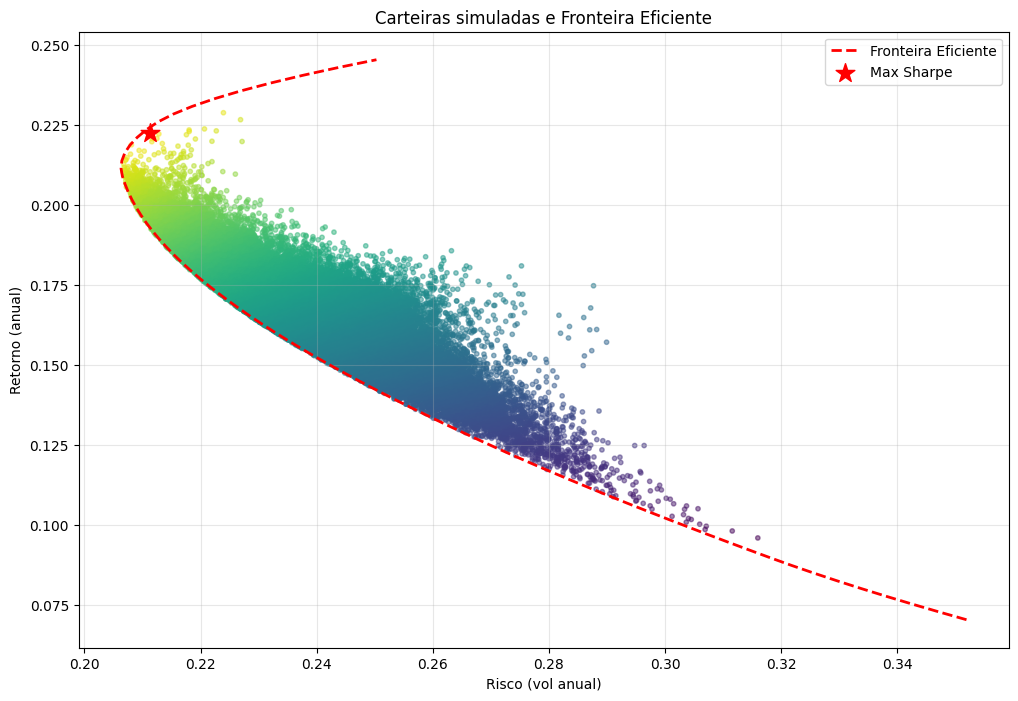

In [19]:
# Plot com fronteira eficiente
plt.figure(figsize=(12,8))
plt.scatter(resultados_dataframe['risco'], resultados_dataframe['retorno'], c=resultados_dataframe['sharpe'], cmap='viridis', s=10, alpha=0.5)
plt.plot(front_risk, front_ret, 'r--', linewidth=2, label='Fronteira Eficiente')
plt.scatter(max_sharpe['risco'], max_sharpe['retorno'], color='red', marker='*', s=200, label='Max Sharpe')
plt.legend()
plt.xlabel('Risco (vol anual)')
plt.ylabel('Retorno (anual)')
plt.title('Carteiras simuladas e Fronteira Eficiente')
plt.grid(True, alpha=0.3)
plt.show()

In [20]:
# Carteira ótima
melhor = resultados_dataframe.loc[resultados_dataframe['sharpe'].idxmax()]
print('\nCarteira com maior índice de Sharpe (amostra Monte Carlo):')
print(melhor[['retorno', 'risco', 'sharpe']])
print('\nPesos:')
for t in bilhete:
  print(f"{t}: {melhor[t]:.4f} ({melhor[t]*100:.2f}%)")


Carteira com maior índice de Sharpe (amostra Monte Carlo):
retorno    0.222684
risco      0.211224
sharpe     0.959568
Name: 42038, dtype: float64

Pesos:
AAPL: 0.0273 (2.73%)
GOOG: 0.0065 (0.65%)
MSFT: 0.0598 (5.98%)
AMZN: 0.6388 (63.88%)
JPM: 0.2676 (26.76%)


In [21]:
# Para evolução do patrimônio usamos retornos simples diários
ret_simple = np.exp(ret_log_assets) - 1
pesos_opt = melhor[bilhete].values
ret_port_daily = ret_simple.dot(pesos_opt)
patrimonio = capital_inicial * (1 + ret_port_daily).cumprod()

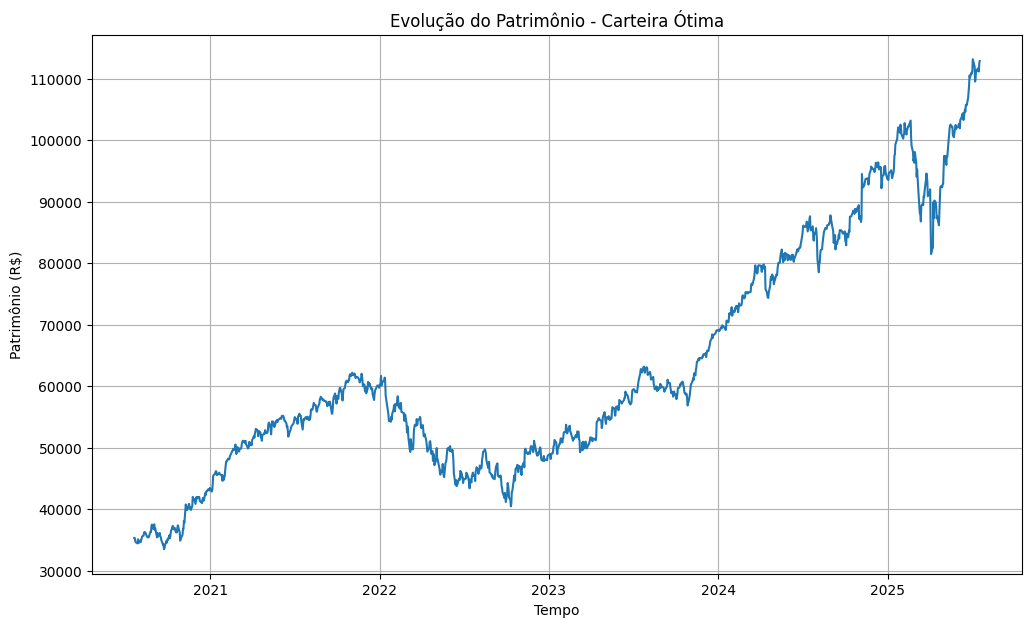

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(patrimonio.index, patrimonio.values)
plt.title('Evolução do Patrimônio - Carteira Ótima')
plt.xlabel('Tempo')
plt.ylabel('Patrimônio (R$)')
plt.grid(True)
plt.show()

In [22]:
ret_acumulado = patrimonio.iloc[-1] / capital_inicial - 1
print(f"Retorno acumulado no período: {ret_acumulado*100:.2f}%")

Retorno acumulado no período: 222.56%


In [23]:
rets_port = ret_port_daily.dropna()
var_95_pct = -np.percentile(rets_port, 5) # perda esperada no pior 5%
var_99_pct = -np.percentile(rets_port, 1)
var_95_monet = var_95_pct * capital_inicial
var_99_monet = var_99_pct * capital_inicial

In [24]:
print('\nValue at Risk (VaR) - Histórico (1 dia):')
print(f'VaR 95%: {var_95_pct*100:.2f}% -> R$ {var_95_monet:,.2f}')
print(f'VaR 99%: {var_99_pct*100:.2f}% -> R$ {var_99_monet:,.2f}')


Value at Risk (VaR) - Histórico (1 dia):
VaR 95%: 2.08% -> R$ 729.57
VaR 99%: 3.49% -> R$ 1,221.87


In [25]:
# VaR via Monte Carlo (1 dia)
NMC = 10000
mu_daily = ret_simple.mean().values
cov_daily = ret_simple.cov().values
sims = np.random.multivariate_normal(mu_daily, cov_daily, size=NMC)
sims_port = sims.dot(pesos_opt)
var_mc_95 = -np.percentile(sims_port, 5)
var_mc_99 = -np.percentile(sims_port, 1)
print('\nVaR Monte Carlo (1 dia):')
print(f'VaR MC 95%: {var_mc_95*100:.2f}% -> R$ {var_mc_95*capital_inicial:,.2f}')
print(f'VaR MC 99%: {var_mc_99*100:.2f}% -> R$ {var_mc_99*capital_inicial:,.2f}')


VaR Monte Carlo (1 dia):
VaR MC 95%: 2.05% -> R$ 717.12
VaR MC 99%: 3.00% -> R$ 1,048.66


In [26]:
# Comparação com Benchmark
ret_sp_anual = retorno['SP'].mean() * dias_uteis
vol_sp_anual = retorno['SP'].std() * np.sqrt(dias_uteis)
sharpe_sp = (ret_sp_anual - rf_anual) / vol_sp_anual

print('\nBenchmark (S&P500) - anualizado:')
print(f'Retorno anual: {ret_sp_anual:.4f}, Volatilidade anual: {vol_sp_anual:.4f}, Sharpe: {sharpe_sp:.4f}')
print('\nComparação (Melhor carteira vs Benchmark):')
print(f"Melhor carteira - Retorno: {melhor['retorno']:.4f}, Risco: {melhor['risco']:.4f}, Sharpe: {melhor['sharpe']:.4f}")
if melhor['sharpe'] > sharpe_sp:
  print('A melhor carteira superou o benchmark em termos de Sharpe.')
else:
  print('A melhor carteira não superou o benchmark em termos de Sharpe.')


Benchmark (S&P500) - anualizado:
Retorno anual: 0.1327, Volatilidade anual: 0.1738, Sharpe: 0.6484

Comparação (Melhor carteira vs Benchmark):
Melhor carteira - Retorno: 0.2227, Risco: 0.2112, Sharpe: 0.9596
A melhor carteira superou o benchmark em termos de Sharpe.
